# Life Expectancy Predicton 

## Import Libraries

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

## Read Dataset

In [134]:
df = pd.read_csv('Life_Expectancy_Data.csv')

## Dataset Overview

In [135]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [136]:
df.shape

(2938, 22)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [138]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [139]:
df.describe(include='object')

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


## Data Preparation

Since the *Country* column has too many unique values, it is better to remove it.

In [140]:
df.drop('Country', axis=1, inplace=True)

### Editing Feature Names

In [141]:
df.rename(columns = {'Life expectancy ':'Life expectancy', 'infant deaths':'Infant deaths',
                     'percentage expenditure': 'Percentage expenditure', 'Measles ': 'Measles',
                     ' BMI ': 'BMI', 'under-five deaths ': 'Under-five deaths',
                     'Diphtheria ': 'Diphtheria', ' HIV/AIDS': 'HIV/AIDS',
                     ' thinness  1-19 years': 'Thinness 1-19 years', 
                     ' thinness 5-9 years': 'Thinness 5-9 years'}, 
          inplace = True)

### Outlier Detection

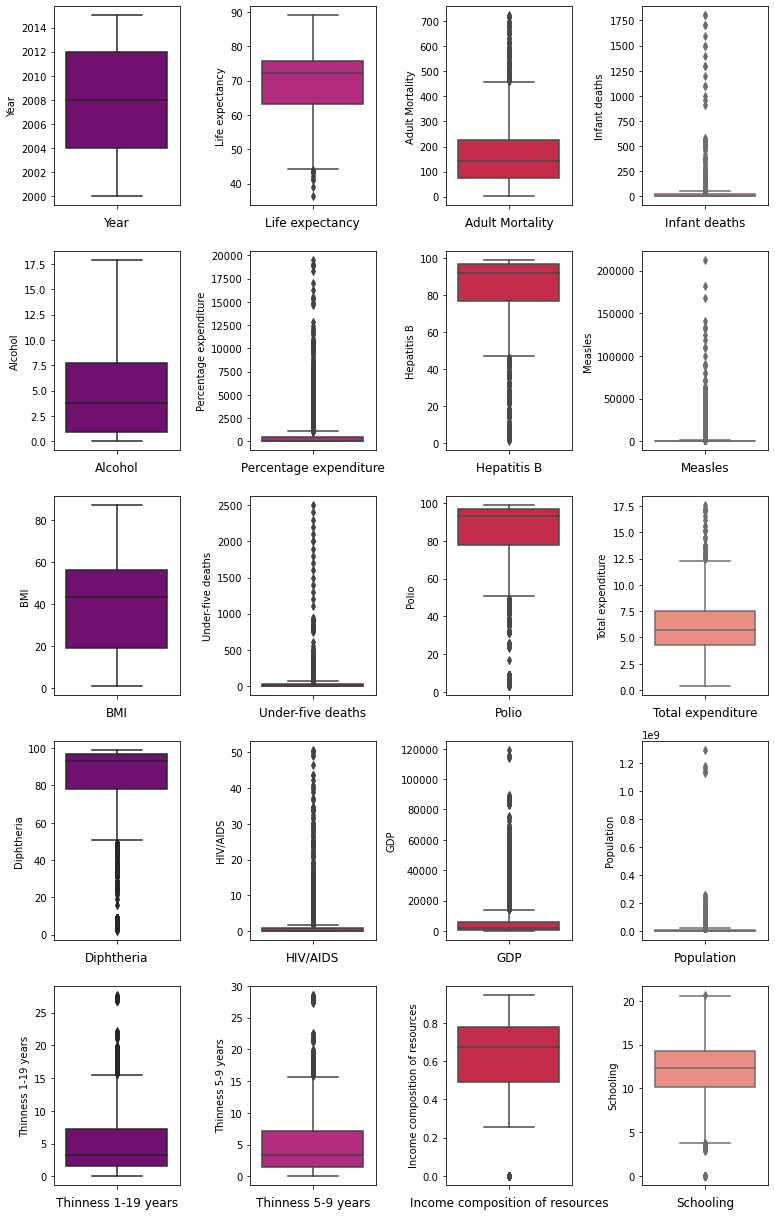

In [142]:
f, ax = plt.subplots(5, 4, figsize=(11,17), tight_layout = True)

columns = df.select_dtypes(exclude='object').columns
colors = ['purple', 'mediumvioletred', 'crimson', 'salmon', 'peachpuff']
for i, col in enumerate(columns):
    x = i // 4
    y = i % 4
    sns.boxplot(y=col, data=df, ax=ax[x,y], color=colors[y])
    ax[x,y].set_xlabel(col, fontsize=12)

<AxesSubplot:xlabel='Life expectancy', ylabel='Status'>

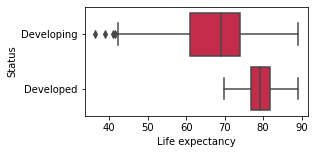

In [143]:
plt.figure(figsize=(4,2))
sns.boxplot(y='Status', x='Life expectancy', data=df, color=colors[2])

**As can be seen from the boxplots, there are outliers in the dataset.**

In [144]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
lower_bound = lower_bound[1:]
upper_bound = upper_bound[1:]

outliers_indexes = []
for i, col in enumerate(columns[1:]):
    outliers = df[(df[col] < lower_bound[i]) | (df[col] > upper_bound[i])]
    outliers_indexes.extend(outliers.index.tolist())
    
outliers_indexes = list(set(outliers_indexes))
len(outliers_indexes)

1764

**1764 outliers were identified, so we can not drop them all.**

In [145]:
df['label'] = 'normal'
df.loc[outliers_indexes, 'label'] = 'outliers'

removing_indexes = []
removing_indexes.extend(df[df['Life expectancy']<41].index)
removing_indexes.extend(df[df['Measles']>150000].index)
removing_indexes.extend(df[df['GDP']>100000].index)
removing_indexes.extend(df[df['Population']>1200000000].index)
df.loc[removing_indexes,'label'] = 'removing'

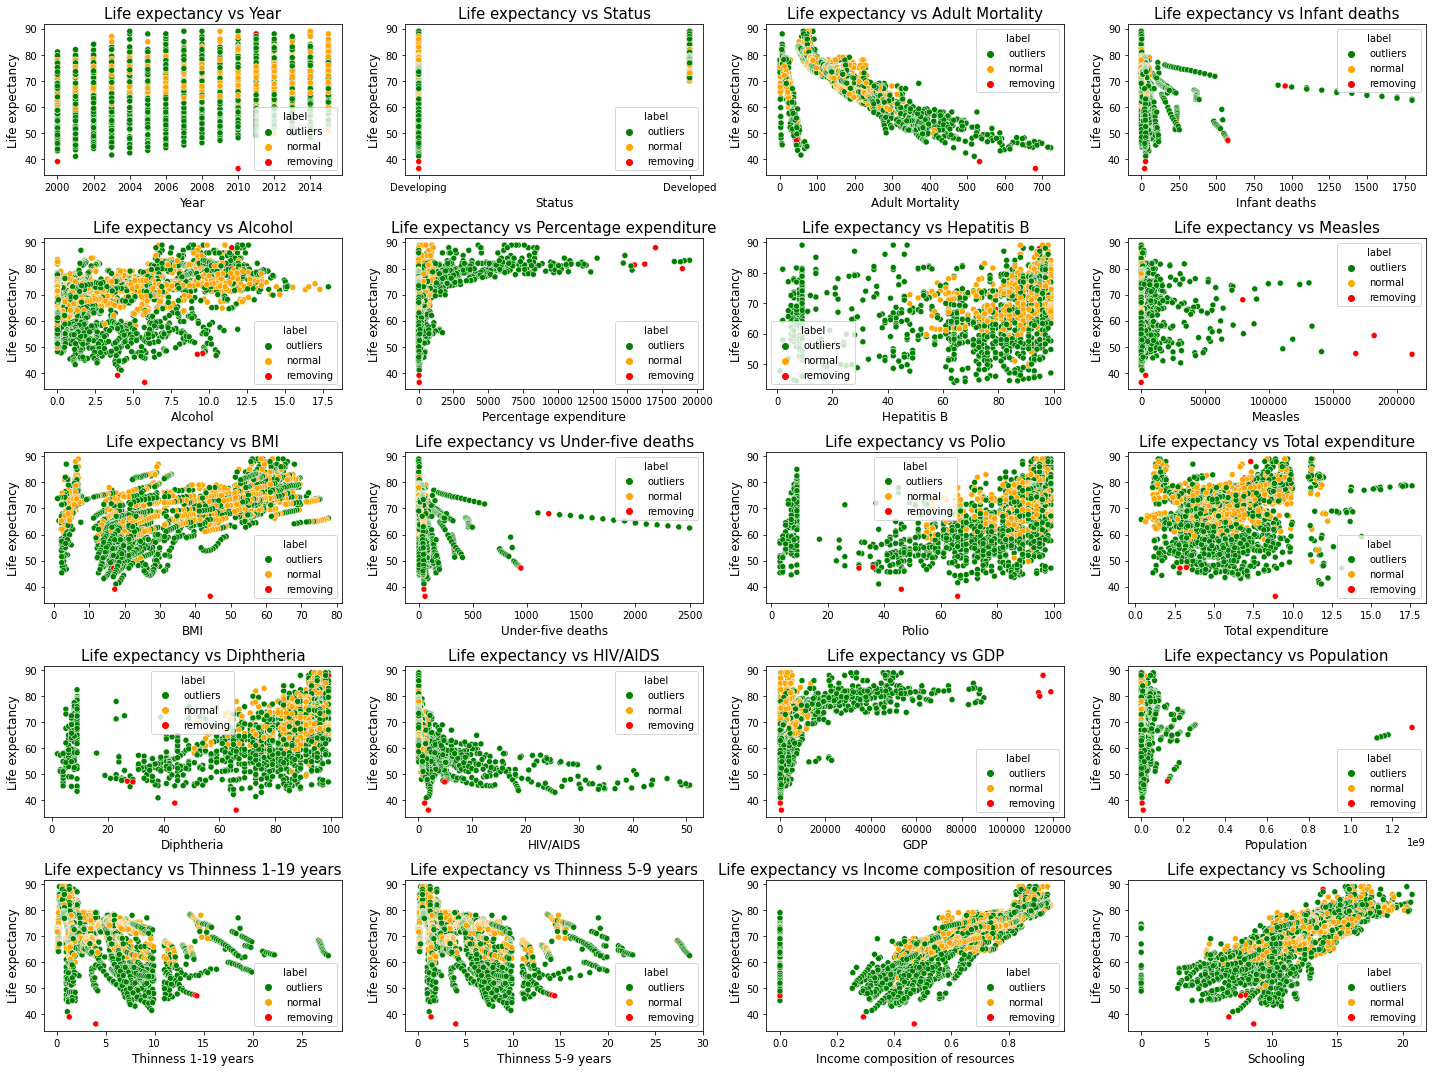

In [146]:
target = 'Life expectancy'
columns_outliers = df.columns.drop(target)
colors_outliers = ['green', 'orange', 'red']

f, ax = plt.subplots(5, 4, figsize=(20,15), tight_layout = True)
CustomPalette = sns.set_palette(sns.color_palette(colors_outliers))

for i, col in enumerate(columns_outliers[:-1]):
    x = i // 4
    y = i % 4
    sns.scatterplot(data=df, x=col, y=target, hue='label', ax=ax[x,y])
    ax[x,y].set_title(f'{target} vs {col}', size=15)
    ax[x,y].set_xlabel(col, size=12)
    ax[x,y].set_ylabel(target, size=12)    

In [147]:
df.drop('label', axis=1, inplace=True)

**These samples are not sufficiently different from the general pattern found in scatter plots of the data. So we can't drop them.**

### Discover Duplicates

In [148]:
df[df.duplicated(keep=False)]

,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling


**There is no duplicates in dataset.**

### Discover Missing Values

In [149]:
df.isnull().sum()

Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
Infant deaths                        0
Alcohol                            194
Percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
Under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness 1-19 years                 34
Thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

#### Imputing Missing Values

In [150]:
missing_val = df.columns[df.isnull().any()]

for col in missing_val:
    df[col].fillna(method='ffill', inplace=True)

In [151]:
df.isnull().sum()

Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
Infant deaths                      0
Alcohol                            0
Percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
Under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness 1-19 years                0
Thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

## EDA

### Categorical Variables Analysis

<AxesSubplot:xlabel='Status', ylabel='Life expectancy'>

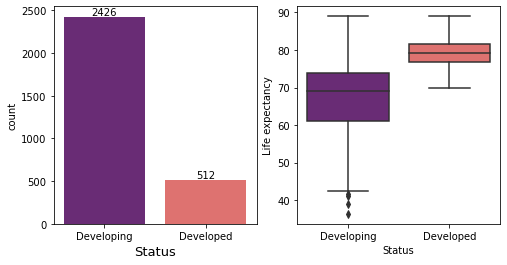

In [152]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))

graph = sns.countplot(x='Status', data=df, palette='magma', ax=ax[0])
for cont in graph.containers:
    graph.bar_label(cont)
ax[0].set_xlabel('Status', size=13)

sns.boxplot(x='Status', y=target, data=df, palette='magma', ax=ax[1])

### Numerical Variables Analysis

Text(0.5, 0.98, 'Distribution of Numerical Variables')

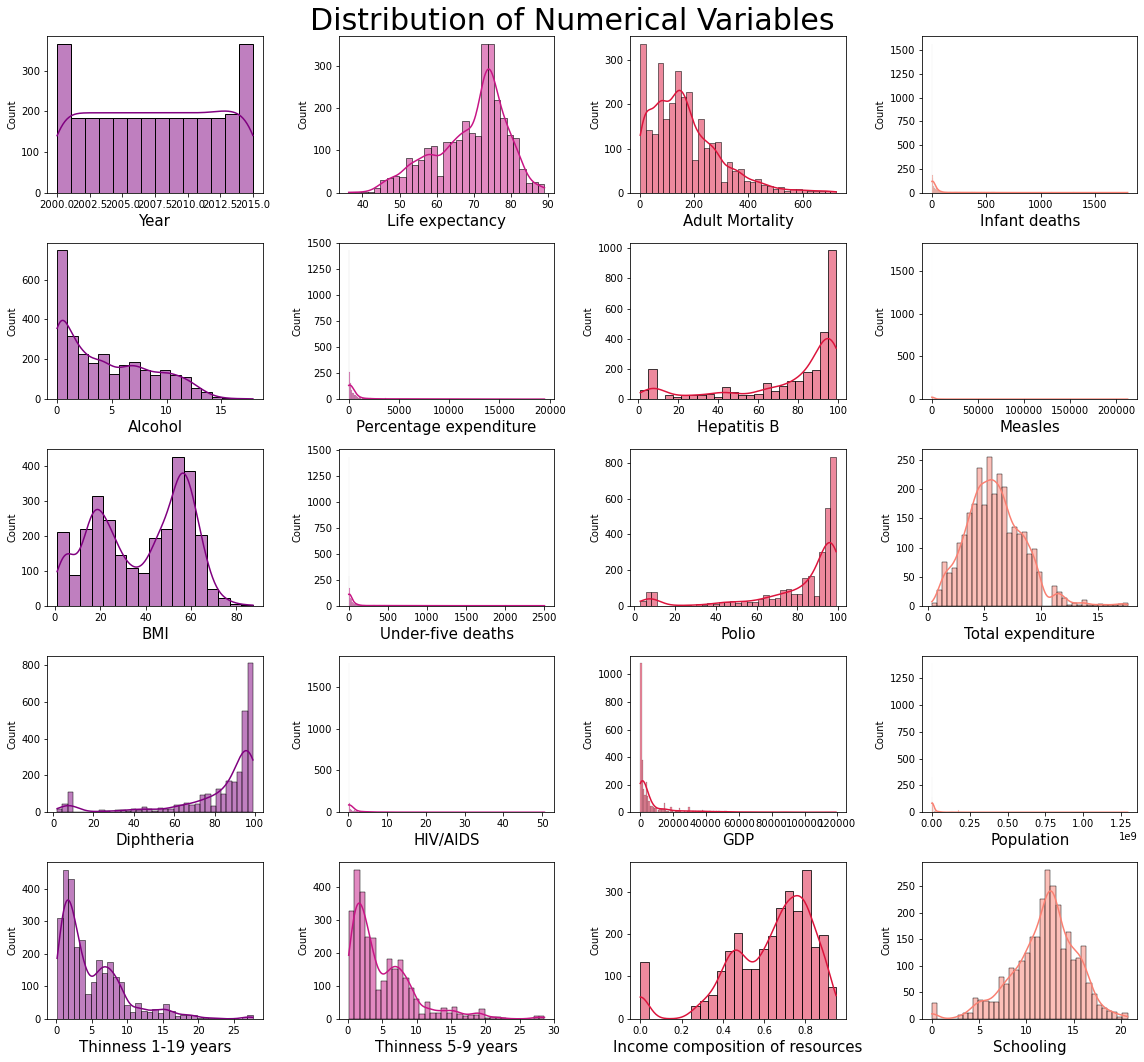

In [153]:
f, ax = plt.subplots(5, 4, figsize=(16,15), tight_layout = True)


for i, col in enumerate(columns):
    x = i // 4
    y = i % 4
    sns.histplot(df[col], kde=True, ax=ax[x,y], color=colors[y])
    ax[x,y].set_xlabel(col, fontsize=15)

plt.suptitle('Distribution of Numerical Variables', fontsize=30)

**All variables have a non-normal distribution.**

## Categorical Variables Encoding

In [154]:
df = pd.get_dummies(df, columns=['Status'], drop_first=True)
df.head(5)

,Year,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1


## Correlation Analysis

<AxesSubplot:>

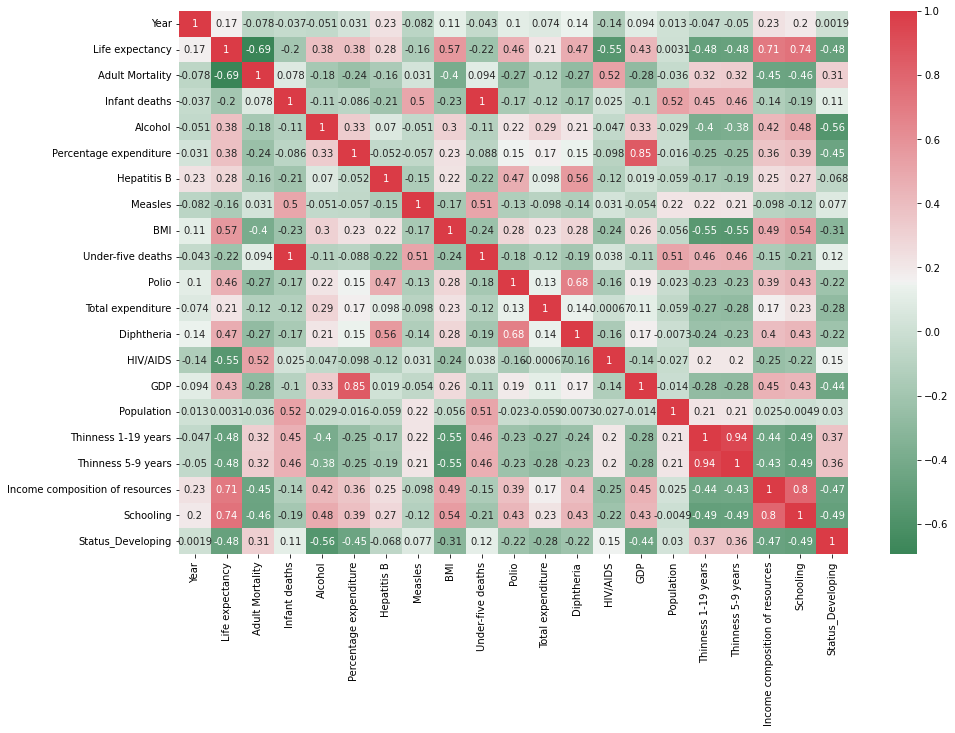

In [155]:
plt.figure(figsize=(15,10))
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap=cmap)

**There are also some independent variables that are highly correlated:**
* *Infant deaths - Under-five deaths (1)*
* *Percentage expenditure - GDP (0.85)*
* *Thinness 1-19 years - Thinness 5-9 years (0.94)*
* *Income composition of resources - Schooling (0.8)*

**In order to avoid multicollinearity we can drop the *Infant deaths* column.** 

In [156]:
df.drop('Infant deaths', axis=1, inplace=True)

## Linear Regression

### Split the Dataset

In [157]:
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Scale the Data

In [158]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Train the Model

In [159]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [160]:
pd.DataFrame(data=np.append(lin_reg.intercept_, lin_reg.coef_),
             index=['intercept'] + [i+' coef.' for i in X.columns],
             columns=['Value']).sort_values('Value', ascending=False)

,Value
intercept,69.092947
Schooling coef.,2.212037
Income composition of resources coef.,1.530211
BMI coef.,0.911414
Diphtheria coef.,0.836232
Polio coef.,0.588963
Thinness 5-9 years coef.,0.587515
GDP coef.,0.383629
Total expenditure coef.,0.368283
Percentage expenditure coef.,0.242569


### Model Evaluation

In [161]:
def model_evaluation(model, X, y, model_name):
    
    y_pred = model.predict(X)
    
    mse = metrics.mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2_score = metrics.r2_score(y, y_pred)
    
    return pd.DataFrame([mse, rmse, r2_score],
                        index=['MSE', 'RMSE', 'R2-score'],
                        columns=[model_name])

In [162]:
model_evaluation(lin_reg, X_test_scaled, y_test, 'Linear reg.')

,Linear reg.
MSE,16.967925
RMSE,4.119214
R2-score,0.810949


### Cross-Validation

In [163]:
pipeline = make_pipeline(StandardScaler(), LinearRegression())

kf = KFold(n_splits=6, shuffle=True, random_state=0)
scoring = ['neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
result = cross_validate(pipeline, X, y, cv=kf, return_train_score=True, scoring=scoring)

MSE_mean = -result['test_neg_mean_squared_error'].mean()
MSE_std = -result['test_neg_mean_squared_error'].std()
RMSE_mean = -result['test_neg_root_mean_squared_error'].mean()
RMSE_std = -result['test_neg_root_mean_squared_error'].std()
R2_score_mean = result['test_r2'].mean()
R2_score_std = result['test_r2'].std()

pd.DataFrame({'Mean': [MSE_mean, RMSE_mean, R2_score_mean],
              'Std': [MSE_std, RMSE_std, R2_score_std]},
              index=['MSE', 'RMSE', 'R2-score'])

,Mean,Std
MSE,17.434725,-2.580664
RMSE,4.165006,-0.295726
R2-score,0.807619,0.030506


### Assumptions

**1. Linearity**

In [164]:
def residuals(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    results = pd.DataFrame({'Actual': y_test,
                           'Predicted': y_pred})
    results['Residuals'] = abs(results['Actual']) - abs(results['Predicted'])
    
    return results


def linear_assumption(model, X_test, y_test):
    
    results = residuals(model, X_test, y_test)
    
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    
    sns.regplot(x='Predicted', y='Actual', data=results, ax=ax[0], lowess=True,
                scatter_kws={'color': 'dodgerblue'}, line_kws={'color': 'blue'})
    ax[0].set_title('Actual vs. Predicted Values', size=15)
    
    sns.regplot(x='Predicted', y='Residuals', data=results, ax=ax[1], lowess=True,
                scatter_kws={'color': 'dodgerblue'}, line_kws={'color': 'blue'})
    ax[1].set_title('Residuals vs. Predicted Values', size=15)

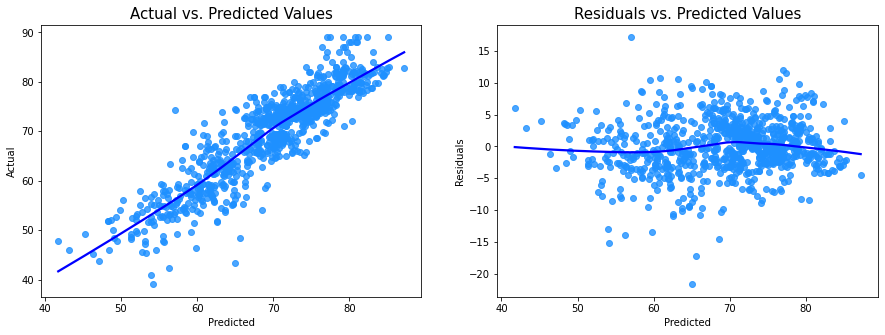

In [165]:
linear_assumption(lin_reg, X_test_scaled, y_test)

As we can see from the plots, the linear assumption is possibly satisfied.

**2. Normality of the Residuals**

In [166]:
def normal_errors_assumption(model, X_test, y_test):
    
    results = residuals(model, X_test, y_test)
    
    print('mean =', round(np.mean(results['Residuals']),4))
    print('std =', round(np.std(results['Residuals']),4))
    
    p_val = stats.shapiro(results['Residuals'])[1]
    
    if p_val > 0.05:
        print(f'P-value: {p_val}.\nResiduals are normally distributed.\nAssumption satisfied.')
    else:
        print(f'P-value: {p_val}.\nResiduals aren`t normally distributed.\nAssumption isn`t satisfied.')
        
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    
    sns.histplot(x='Residuals', data=results, kde=True, bins=30, ax=ax[0])
    ax[0].set_title('Distribution of Residuals', size=15)
    
    stats.probplot(results['Residuals'], dist='norm', plot=ax[1])
    ax[1].set_title('Residuals Q-Q Plot', size=15)

mean = 0.0206
std = 4.1192
P-value: 6.559769616387712e-09.
Residuals aren`t normally distributed.
Assumption isn`t satisfied.


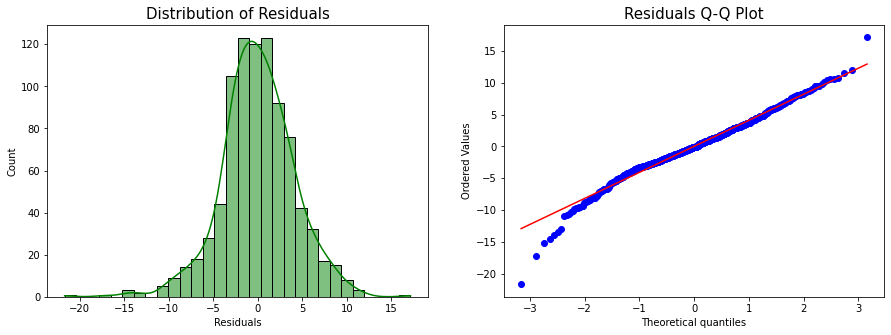

In [167]:
normal_errors_assumption(lin_reg, X_test_scaled, y_test)

This can be solved by applying a nonlinear transformation to the target variable and features or by removing potential outliers.

**3. Independence**

In [168]:
def multicollinearity_assumption(X):
    
    vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    
    multicollinearity_10 = sum([1 for i in vif if i>10])
    multicollinearity_100 = sum([1 for i in vif if i>100])
    
    if multicollinearity_100 == 0:
        if multicollinearity_10 == 0:
            print(f'There is no multicollinearity.\nAssumption is sutisfied.')
        else:
            print(f'There are {multicollinearity_10} cases of possible multicolinearity.\nAssumption is possibly sutisfied.')
    else: 
        print(f'''
        There are {multicollinearity_100} cases of multicollinearity 
        and {multicollinearity_10} cases of possible multicollinearity.
        Assumption isn`t sutisfied.
        ''')
        
    return pd.DataFrame({'vif': vif}, index=X.columns).sort_values('vif', ascending=False)

In [169]:
multicollinearity_assumption(X)

There are 9 cases of possible multicolinearity.
Assumption is possibly sutisfied.


,vif
Year,70.793842
Schooling,47.383316
Income composition of resources,30.162410
Diphtheria,29.266541
Polio,26.221589
Thinness 1-19 years,20.445422
Thinness 5-9 years,20.080767
Hepatitis B,12.670456
Status_Developing,10.576595
BMI,8.058822


To solve this problem, we can use regularization, features with a high vif value can be removed, or we can use PCA (reducing features to a smaller set of uncorrelated components).

**4. No Autocorrelation of the Residuals**

In [170]:
def autocorrelation_assumption(model, X_test, y_test):
    
    results = residuals(model, X_test, y_test)
    
    dw = durbin_watson(results['Residuals'])
    print('Durbin-Watson: ', round(dw,3))
    
    if dw < 1.5:
        print('Signs of positive autocorrelation.\nAssumtion is not satisfied.')
    elif dw > 2.5:
        print('Signs of negative autocorrelation.\nAssumption is not satisfied.')
    else:
        print('No autocorrelation.\nAssumption is satisfied.')

In [171]:
autocorrelation_assumption(lin_reg, X_test_scaled, y_test)

Durbin-Watson:  2.065
No autocorrelation.
Assumption is satisfied.


**5. Homoscedasticity**

In [172]:
def homoscedasticity_assumption(model, X_test, y_test):
    
    results = residuals(model, X_test, y_test)
    
    fig = plt.figure(figsize=(5,5))
    sns.regplot(x='Predicted', y='Residuals', data=results, lowess=True,
                scatter_kws={'color': 'dodgerblue'}, line_kws={'color': 'blue'})
    plt.axhline(y=0, color='orange', lw=2, ls='--')
    plt.title('Residuals vs. Predicted Values', size=15)

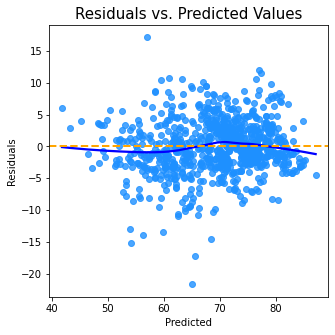

In [173]:
homoscedasticity_assumption(lin_reg, X_test_scaled, y_test)

As we can see from the plots, the homoscedasticity assumption is possibly satisfied.

**Conclusions:**
* We can drop *Year* column to reduce the multicollinearity.
* In order to improve the satisfaction of the normality of the residuals and the homoscedasticity assumption, we can apply polynomial regression.
* In order to reduce the probability of the model to be overfit, we can use regularization.

In [174]:
df.drop(['Year'], axis=1, inplace=True)

In [175]:
X = df.drop(target, axis=1)
y = df[target]

## 2nd-order Polynomial Regression

### Create the features

In [176]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

poly_features_names = poly_features.get_feature_names_out(X.columns)
X_poly = pd.DataFrame(X_poly, columns=poly_features_names)
X_poly.head(5)

,Adult Mortality,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,...,Thinness 5-9 years^2,Thinness 5-9 years Income composition of resources,Thinness 5-9 years Schooling,Thinness 5-9 years Status_Developing,Income composition of resources^2,Income composition of resources Schooling,Income composition of resources Status_Developing,Schooling^2,Schooling Status_Developing,Status_Developing^2
0,263.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,...,299.29,8.2867,174.73,17.3,0.229441,4.8379,0.479,102.01,10.1,1.0
1,271.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,8.18,62.0,...,306.25,8.3300,175.00,17.5,0.226576,4.7600,0.476,100.00,10.0,1.0
2,268.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,8.13,64.0,...,313.29,8.3190,175.23,17.7,0.220900,4.6530,0.470,98.01,9.9,1.0
3,272.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,8.52,67.0,...,324.00,8.3340,176.40,18.0,0.214369,4.5374,0.463,96.04,9.8,1.0
4,275.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,7.87,68.0,...,331.24,8.2628,172.90,18.2,0.206116,4.3130,0.454,90.25,9.5,1.0


### Split the Dataset

In [177]:
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)

### Scale the Data

In [178]:
scaler = StandardScaler()

X_poly_train = scaler.fit_transform(X_poly_train)
X_poly_train = pd.DataFrame(X_poly_train, columns=poly_features_names)

X_poly_test = scaler.transform(X_poly_test)
X_poly_test = pd.DataFrame(X_poly_test, columns=poly_features_names)

### Train the Model

In [179]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_poly_train)

LinearRegression()

### Model Evaluation

**Performance on Test Data:**

In [180]:
poly_evaluation = model_evaluation(poly_reg, X_poly_test, y_poly_test, 'Poly. Reg. Test')
poly_evaluation

,Poly. Reg. Test
MSE,8.889835
RMSE,2.981583
R2-score,0.900952


**Performance on Train Data:**

In [181]:
model_evaluation(poly_reg, X_poly_train, y_poly_train, 'Poly. Reg. Train')

,Poly. Reg. Train
MSE,6.807950
RMSE,2.609205
R2-score,0.925499


### Cross-Validation

In [182]:
pipeline = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(),  LinearRegression())

kf = KFold(n_splits=6, shuffle=True, random_state=0) 
scoring = ['neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
result2 = cross_validate(pipeline, X, y, cv=kf, return_train_score=True, scoring=scoring)

MSE_mean = (-result2['test_neg_mean_squared_error']).mean()
MSE_std = (-result2['test_neg_mean_squared_error']).std()
RMSE_mean = (-result2['test_neg_root_mean_squared_error']).mean()
RMSE_std = (-result2['test_neg_root_mean_squared_error']).std()
R2_Score_mean = result2['test_r2'].mean()
R2_Score_std = result2['test_r2'].std()

pd.DataFrame({'Mean': [MSE_mean, RMSE_mean, R2_Score_mean], 
              'Std': [MSE_std, RMSE_std, R2_Score_std]},
             index=['MSE', 'RMSE' ,'R2-Score'])

,Mean,Std
MSE,9.713552,0.997487
RMSE,3.112457,0.161750
R2-Score,0.892782,0.012492


Using second-order features has improved the model's performance:
* **MSE**: 16.968 -> 8.889
* **RMSE**: 4.119 -> 2.981
* **R2-Score**: 0.822 -> 0.900

The model's accuracy on training and testing is close to each other, indicating that it is not overfit. 

### Assumptions

**1. Linearity**

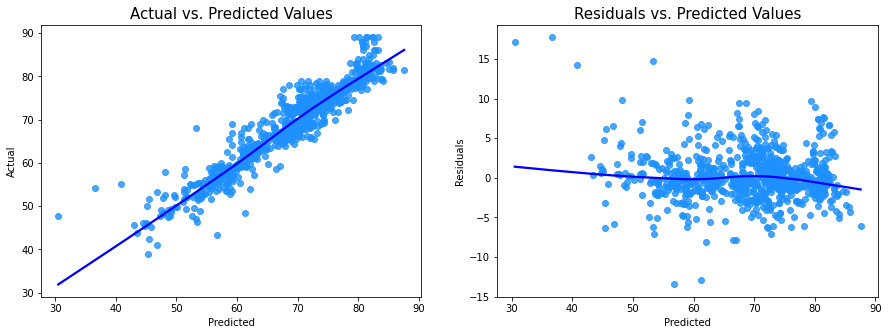

In [183]:
linear_assumption(poly_reg, X_poly_test, y_poly_test)

As we can see from the plots, the linear assumption is satisfied.

**2. Normality of Residuals**

mean = 0.2219
std = 2.9733
P-value: 2.4660771791195213e-19.
Residuals aren`t normally distributed.
Assumption isn`t satisfied.


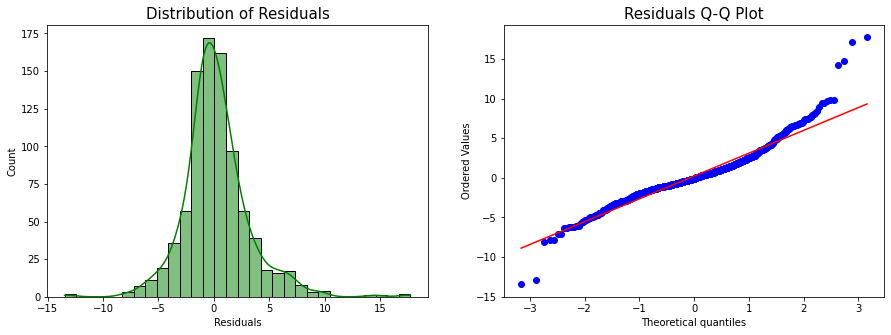

In [184]:
normal_errors_assumption(poly_reg, X_poly_test, y_poly_test)

**3. Independence**

In [185]:
multicollinearity_assumption(X_poly)


        There are 37 cases of multicollinearity 
        and 147 cases of possible multicollinearity.
        Assumption isn`t sutisfied.
        


,vif
Percentage expenditure Income composition of resources,2285.727699
Percentage expenditure,960.318891
Measles,719.693909
GDP Schooling,652.995142
Percentage expenditure Schooling,649.946228
...,...
Alcohol Status_Developing,3.067954
Percentage expenditure Under-five deaths,2.924732
Income composition of resources Status_Developing,2.666791
Status_Developing^2,2.504187


**4. No Autocorrelation of Residuals**

In [186]:
autocorrelation_assumption(poly_reg, X_poly_test, y_poly_test)

Durbin-Watson:  1.977
No autocorrelation.
Assumption is satisfied.


**5. Homoscedasticity**

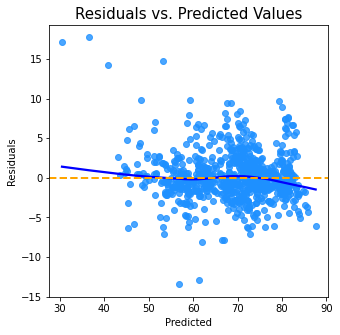

In [187]:
homoscedasticity_assumption(poly_reg, X_poly_test, y_poly_test)

As we can see from the plots, the homoscedasticity assumption is possibly satisfied.

Almost all assumptions are satisfied except for multicollinearity and normality of the residuals. 

**In general, the polynomial model performs better than the linear model on this data set.**

## Ridge Regression

### Split the Dataset

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)

### Scale the Data

In [189]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Train the Model

In [190]:
alphas = 10**np.linspace(10,-2,100)*0.5

ridge_cv = RidgeCV(alphas=alphas, cv=3)                        
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=3)

### Model Evaluation

**Performance on Test Data:**

In [191]:
ridge_evaluation = model_evaluation(ridge_cv, X_test, y_test, 'Ridge Reg. Test')
ridge_evaluation

,Ridge Reg. Test
MSE,8.068510
RMSE,2.840512
R2-score,0.910103


**Performance on Train Data:**

In [192]:
model_evaluation(ridge_cv, X_train, y_train, 'Ridge Reg. Train')

,Ridge Reg. Train
MSE,7.439744
RMSE,2.727589
R2-score,0.918585


Using Ridge regression has improved the model's performance slightly:
* **MSE**: 9.361 -> 8.068
* **RMSE**: 3.059 -> 2.840
* **R2-Score**: 0.896 -> 0.910

The model's accuracy on training and testing is close to each other, indicating that it is not overfit. 

### Assumptions

**1. Linearity**

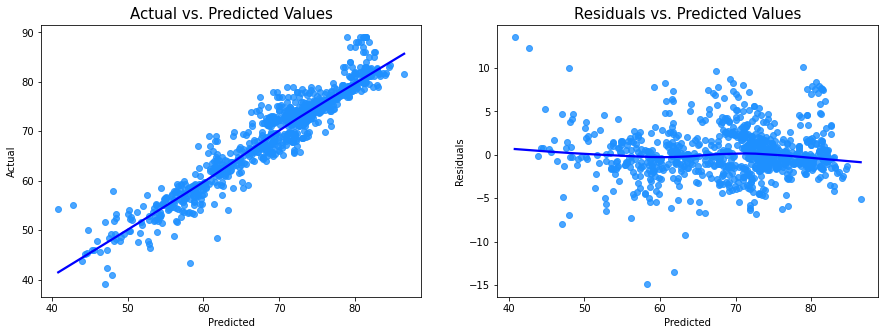

In [193]:
linear_assumption(ridge_cv, X_test, y_test)

Assumption is sutisfied.

**2. Normality of Residuals**

mean = 0.1599
std = 2.836
P-value: 1.3952015687262515e-16.
Residuals aren`t normally distributed.
Assumption isn`t satisfied.


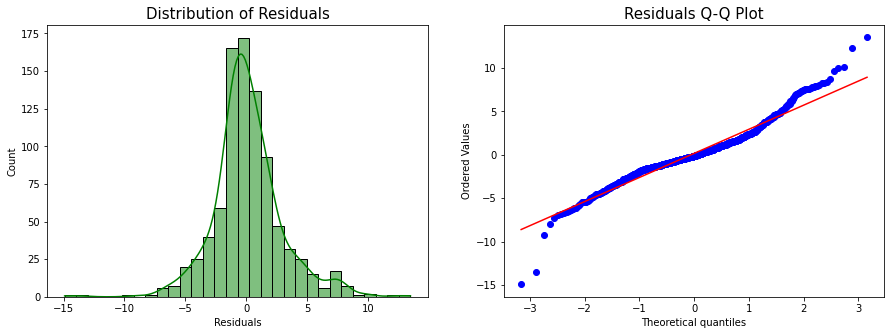

In [194]:
normal_errors_assumption(ridge_cv, X_test, y_test)

**3. Independence**

In [195]:
multicollinearity_assumption(X_poly)


        There are 37 cases of multicollinearity 
        and 147 cases of possible multicollinearity.
        Assumption isn`t sutisfied.
        


,vif
Percentage expenditure Income composition of resources,2285.727699
Percentage expenditure,960.318891
Measles,719.693909
GDP Schooling,652.995142
Percentage expenditure Schooling,649.946228
...,...
Alcohol Status_Developing,3.067954
Percentage expenditure Under-five deaths,2.924732
Income composition of resources Status_Developing,2.666791
Status_Developing^2,2.504187


**4. No Autocorrelation of Residuals**

In [196]:
autocorrelation_assumption(ridge_cv, X_test, y_test)

Durbin-Watson:  2.025
No autocorrelation.
Assumption is satisfied.


**5. Homoscedasticity**

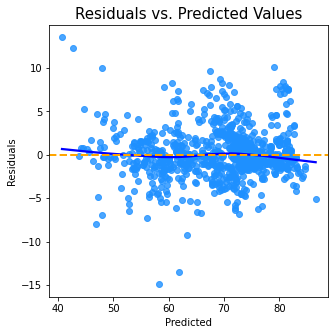

In [197]:
homoscedasticity_assumption(ridge_cv, X_test, y_test)

Assumption is satisfied.

**Some assumptions have been improved slightly compared to the polynomial model.**

## Lasso Regression

### Train the Model

In [198]:
warnings.filterwarnings("ignore")
lasso_cv = LassoCV(alphas=alphas, cv=3)
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=3)

In [199]:
lasso_coef = pd.DataFrame(lasso_cv.coef_, index=X_poly.columns, columns=['Lasso Coef.'])
lasso_coef = lasso_coef[lasso_coef['Lasso Coef.']!=0]
lasso_coef

,Lasso Coef.
Adult Mortality,3.787824
Alcohol,1.281187
BMI,4.937947
Under-five deaths,-0.361594
HIV/AIDS,-4.377651
...,...
Income composition of resources^2,6.846084
Income composition of resources Schooling,-1.516012
Income composition of resources Status_Developing,-1.435436
Schooling^2,1.323806


### Model Evaluation

**Performance on Test Data:**

In [200]:
lasso_evaluation = model_evaluation(lasso_cv, X_test, y_test, 'Lasso Reg.')
lasso_evaluation

,Lasso Reg.
MSE,8.408980
RMSE,2.899824
R2-score,0.906310


**Performance on Train Data:**

In [201]:
model_evaluation(lasso_cv, X_train, y_train, 'Lasso Reg.')

,Lasso Reg.
MSE,8.259365
RMSE,2.873911
R2-score,0.909616


Using Lasso regression did not significantly change the performance of the model compared to Ridge regression.

### Assumptions

**1. Linearity**

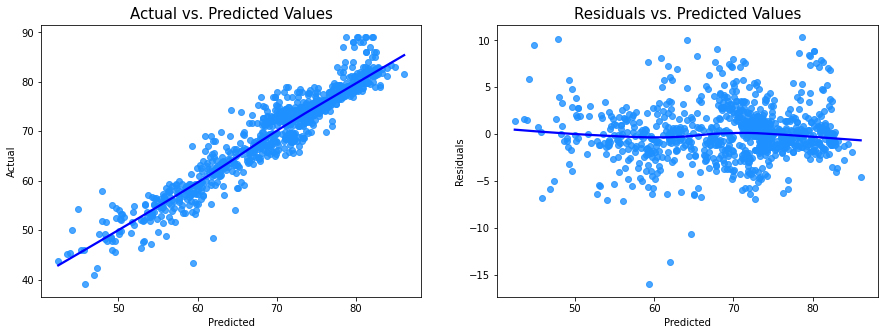

In [202]:
linear_assumption(lasso_cv, X_test, y_test)

Assumption is sutisfied.

**2. Normality of Residuals**

mean = 0.0957
std = 2.8982
P-value: 2.994253209972716e-15.
Residuals aren`t normally distributed.
Assumption isn`t satisfied.


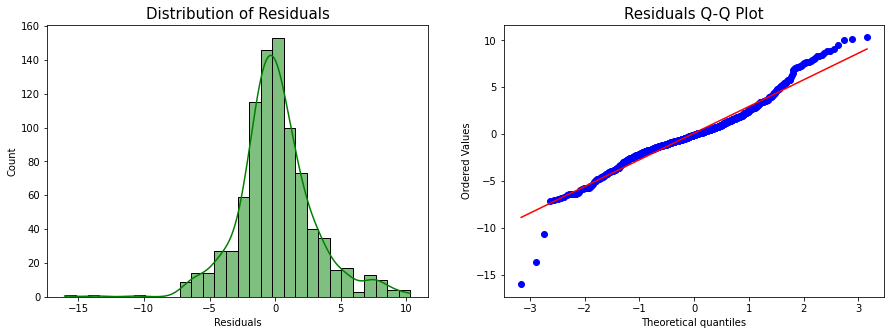

In [203]:
normal_errors_assumption(lasso_cv, X_test, y_test)

**3. Independence**

In [204]:
multicollinearity_assumption(X_poly[lasso_coef.index])


        There are 12 cases of multicollinearity 
        and 69 cases of possible multicollinearity.
        Assumption isn`t sutisfied.
        


,vif
HIV/AIDS Status_Developing,4.827847e+06
HIV/AIDS,4.817637e+06
Under-five deaths,1.411376e+04
Under-five deaths Status_Developing,1.408153e+04
Income composition of resources Schooling,2.070581e+02
...,...
Under-five deaths GDP,3.519123e+00
HIV/AIDS Population,2.551018e+00
Percentage expenditure Under-five deaths,2.512251e+00
Percentage expenditure Measles,2.298332e+00


**4. No Autocorrelation of Residuals**

In [205]:
autocorrelation_assumption(lasso_cv, X_test, y_test)

Durbin-Watson:  2.089
No autocorrelation.
Assumption is satisfied.


**5. Homoscedasticity**

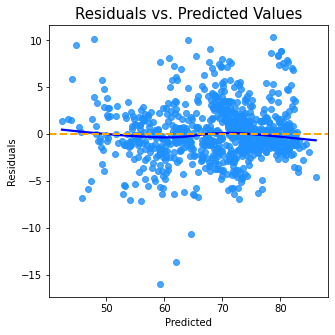

In [206]:
homoscedasticity_assumption(lasso_cv, X_test, y_test)

Assumption is sutisfied.

**The assumption of multicollinearity is more satisfied in the Lasso regression model.**

## Elastic-Net Regression

### Train the Model

In [207]:
elastic_cv = ElasticNetCV(alphas=alphas, cv=3)
elastic_cv.fit(X_train, y_train)

ElasticNetCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.424017...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
             cv=3)

In [208]:
elastic_coef = pd.DataFrame(elastic_cv.coef_, index=X_poly.columns, columns=['ElasticNet Coef.'])
elastic_coef = elastic_coef[elastic_coef['ElasticNet Coef.']!=0]
elastic_coef

,ElasticNet Coef.
Adult Mortality,3.597733
Alcohol,1.045653
Percentage expenditure,0.380129
Measles,-0.265431
BMI,4.344893
...,...
Income composition of resources Schooling,-1.893706
Income composition of resources Status_Developing,-1.448613
Schooling^2,1.952257
Schooling Status_Developing,0.868439


### Model Evaluation

**Performance on Test Data:**

In [209]:
elastic_evaluation = model_evaluation(elastic_cv, X_test, y_test, 'Elastic-Net Reg. Test')
elastic_evaluation

,Elastic-Net Reg. Test
MSE,8.176489
RMSE,2.859456
R2-score,0.908900


**Performance on Train Data:**

In [210]:
model_evaluation(elastic_cv, X_train, y_train, 'Elastic-Net Reg. Train')

,Elastic-Net Reg. Train
MSE,7.686283
RMSE,2.772415
R2-score,0.915887


Using Elastic-Net regression did not significantly change the performance of the model compared to Ridge and Lasso regression.

### Assumptions

**1. Linearity**

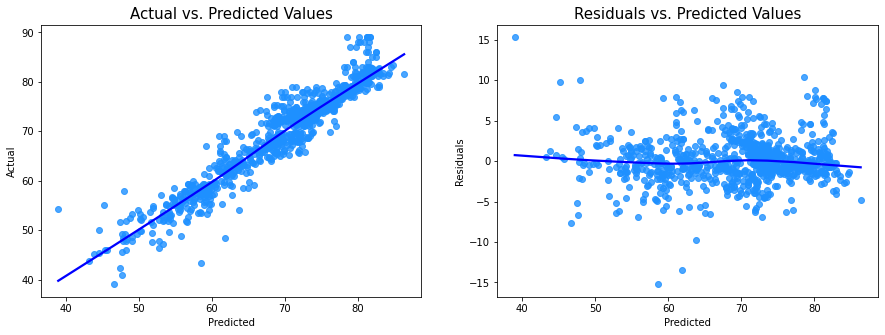

In [211]:
linear_assumption(elastic_cv, X_test, y_test)

Assumption is sutisfied.

**2. Normality of Residuals**

mean = 0.1399
std = 2.856
P-value: 1.2100882091064386e-16.
Residuals aren`t normally distributed.
Assumption isn`t satisfied.


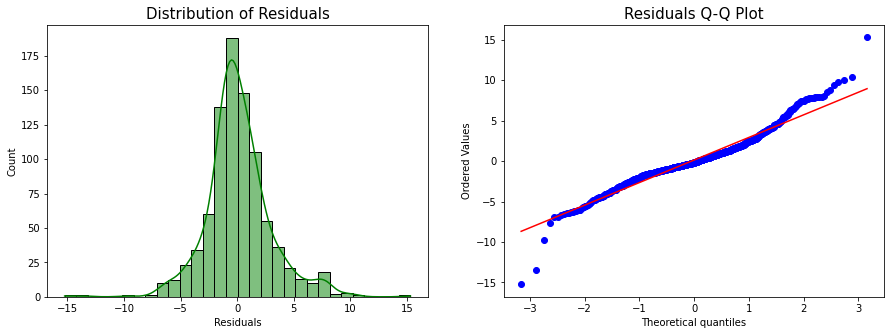

In [212]:
normal_errors_assumption(elastic_cv, X_test, y_test)

**3. Independence**

In [213]:
multicollinearity_assumption(X_poly[elastic_coef.index])


        There are 60 cases of multicollinearity 
        and 136 cases of possible multicollinearity.
        Assumption isn`t sutisfied.
        


,vif
HIV/AIDS,2.022910e+07
HIV/AIDS Status_Developing,2.022192e+07
Status_Developing,5.020854e+06
Status_Developing^2,4.380209e+06
Under-five deaths,1.814767e+04
...,...
Under-five deaths GDP,6.597109e+00
Percentage expenditure Measles,6.051241e+00
HIV/AIDS GDP,4.445104e+00
HIV/AIDS Population,3.530415e+00


**4. No Autocorrelation of Residuals**

In [214]:
autocorrelation_assumption(elastic_cv, X_test, y_test)

Durbin-Watson:  2.053
No autocorrelation.
Assumption is satisfied.


**5. Homoscedasticity**

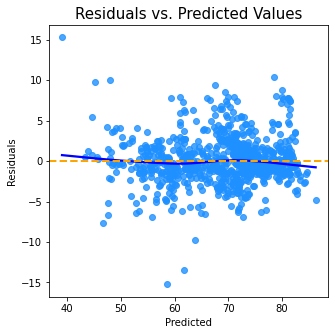

In [215]:
homoscedasticity_assumption(elastic_cv, X_test, y_test)

Assumption is sutisfied.

**The performance of the model is almost the same when using Lasso, Ridge and Elastic-Net regressions. But independence assumption is more satisfied in Lasso model.**

## Final Model

In [216]:
models_evaluation_df = pd.concat([poly_evaluation, ridge_evaluation, lasso_evaluation, elastic_evaluation],
                                 axis=1)
models_evaluation_df.loc['Number of features'] = [X_poly.shape[1], X_poly.shape[1], len(lasso_coef), len(elastic_coef)]
models_evaluation_df

,Poly. Reg. Test,Ridge Reg. Test,Lasso Reg.,Elastic-Net Reg. Test
MSE,8.889835,8.068510,8.408980,8.176489
RMSE,2.981583,2.840512,2.899824,2.859456
R2-score,0.900952,0.910103,0.906310,0.908900
Number of features,189.000000,189.000000,92.000000,150.000000


**Since the performance of the models is almost the same, and Lasso regression uses the least number of features, we will use it for the final model.**

### Features in Final model:

In [217]:
lasso_coef

,Lasso Coef.
Adult Mortality,3.787824
Alcohol,1.281187
BMI,4.937947
Under-five deaths,-0.361594
HIV/AIDS,-4.377651
...,...
Income composition of resources^2,6.846084
Income composition of resources Schooling,-1.516012
Income composition of resources Status_Developing,-1.435436
Schooling^2,1.323806


### Final model scores

In [218]:
lasso_evaluation

,Lasso Reg.
MSE,8.408980
RMSE,2.899824
R2-score,0.906310


### Assumptions

* **Linearity - satisfied**
* **Normality of the Residuals - not satisfied**
* **Independence - not satisfied**
* **No Autocorellation of Residuals - satisfied**
* **Homoscedasticity - satisfied**